In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
fred = pd.read_csv("fred_md.csv")
fred_transforms = fred.iloc[0, :]
fred = fred.iloc[1:, :]

fred["sasdate"] = pd.to_datetime(fred["sasdate"], format="%m/%d/%Y")
fred.index = fred["sasdate"]

fred.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,HWI,HWIURATIO,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,PERMIT,PERMITNE,PERMITMW,PERMITS,PERMITW,ACOGNO,AMDMNOx,ANDENOx,AMDMUOx,BUSINVx,ISRATIOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,NONREVSL,CONSPI,S&P 500,S&P: indust,S&P div yield,S&P PE ratio,FEDFUNDS,CP3Mx,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,COMPAPFFx,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,TWEXAFEGSMTHx,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAUCSL,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1959-01-01,1959-01-01,2442.158,2293.200,17.272,292266.426,18235.774,22.015,23.398,22.285,31.585,18.686,38.150,8.148,20.131,12.139,30.652,20.896,19.918,34.670,80.197,1357.000,0.334,67936.000,63868.000,6.000,16.300,1574.000,1169.000,1396.000,594.000,802.000,291078.000,52478.000,18796.000,713.000,2993.000,14998.000,8740.000,6258.000,33682.000,10774.000,2568.700,5350.300,2418.000,8105.000,39.800,2.500,40.200,1657.000,350.000,452.000,505.000,350.000,NaN,NaN,NaN,NaN,NaN,NaN,14716.483,NaN,42620.346,84889.559,1.560,138.900,286.600,987.900,50500.000,18.900,18300.000,35.213,24.924,48.961,0.125,55.620,59.300,3.158,18.446,2.480,3.300,2.820,3.090,3.360,4.010,4.020,4.120,4.870,0.820,0.340,0.610,0.880,1.530,1.540,1.640,2.390,NaN,4.312,359.842,2.807,0.967,33.100,33.400,30.600,31.600,3.000,32.500,29.010,44.800,29.300,21.100,33.300,38.100,22.900,28.900,30.700,29.600,16.042,56.918,17.791,11.326,2.130,2.450,2.040,NaN,6476.000,12298.000,84.204,NaN
1959-02-01,1959-02-01,2451.778,2301.500,17.452,294424.742,18369.563,22.446,23.714,22.478,31.816,18.784,38.515,8.257,20.769,12.698,31.189,21.280,19.863,34.198,81.443,1421.000,0.358,67649.000,63684.000,5.900,15.500,1554.000,1164.000,1277.000,545.000,732.000,282958.000,52688.000,18890.000,704.200,2980.000,15115.000,8839.000,6276.000,33798.000,10816.000,2575.400,5381.300,2420.000,8116.000,39.700,2.600,40.300,1667.000,346.000,469.000,508.000,344.000,NaN,NaN,NaN,NaN,NaN,NaN,15400.249,NaN,43677.152,85181.811,1.539,139.400,287.700,992.100,49800.000,18.600,18100.000,35.220,25.227,49.514,0.126,54.770,58.330,3.220,18.418,2.430,3.260,2.700,3.130,3.540,3.960,3.960,4.140,4.890,0.830,0.270,0.700,1.110,1.530,1.530,1.710,2.460,NaN,4.313,359.842,2.809,0.975,33.200,33.400,30.700,31.400,3.000,32.500,29.000,44.700,29.400,21.200,33.300,38.100,23.000,28.900,30.700,29.600,16.057,56.951,17.798,11.343,2.140,2.460,2.050,NaN,6476.000,12298.000,83.528,NaN
1959-03-01,1959-03-01,2467.594,2318.500,17.617,293418.670,18523.058,22.770,23.858,22.588,31.816,19.152,38.333,8.346,21.308,13.198,31.657,21.613,19.999,35.064,82.477,1524.000,0.401,68068.000,64267.000,5.600,15.300,1459.000,1093.000,1210.000,530.000,680.000,260346.000,53014.000,19069.000,704.100,3013.000,15259.000,8965.000,6294.000,33945.000,10873.000,2584.400,5431.600,2430.000,8132.000,40.000,2.800,40.400,1620.000,330.000,413.000,503.000,374.000,NaN,NaN,NaN,NaN,NaN,NaN,15745.423,NaN,44781.647,85620.190,1.529,139.700,289.200,998.300,49700.000,18.400,17800.000,35.130,25.422,50.008,0.126,56.160,59.790,3.152,18.999,2.800,3.350,2.800,3.130,3.610,3.990,3.990,4.130,4.850,0.550,0.000,0.330,0.810,1.190,1.190,1.330,2.050,NaN,4.323,359.842,2.813,0.970,33.200,33.300,30.700,31.500,2.970,32.900,28.970,44.700,29.600,21.300,33.200,38.300,23.000,28.900,30.700,29.600,16.068,57.0

## Data preprocessing

Macroeconimic notes: 
- **Nonfarm payrolls** - All Employees: Total Nonfarm, commonly known as Total Nonfarm Payroll, is a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.
- **PPI fin goods** - The Producer Price Index is a family of indexes that measures the average change over time in the selling prices received by domestic producers of goods and services. Finished goods are commodities that will not undergo further processing and are ready for sale to the final-demand user, either an individual consumer or business firm. PPIs measure price change from the perspective of the seller
- **PCEPI** - Personal expentiture consumption price index. The PCE price index is known for capturing inflation (or deflation) across a wide range of consumer expenses and reflecting changes in consumer behavior
- **Housing starts** - measure of new residential construction, and are considered a key economic indicator. A housing start is counted as soon as groundbreaking begins, and each unit in a multi-family housing project is treated as a separate housing start.
- **Treasury yield** - Treasury yield is the effective annual interest rate that the U.S. government pays on one of its debt obligations, expressed as a percentage. Put another way, Treasury yield is the annual return investors can expect from holding a U.S. government security with a given maturity. **Note**: Yield is the annual net profit that an investor earns on an investment. The interest rate is the percentage charged by a lender for a loan. The yield on new investments in debt of any kind reflects interest rates at the time they are issued


In [3]:
features_to_names = {
    "RPI": "real_income", 
    "DPCERA3M086SBEA": "real_consumption",
    "INDPRO": "industrial_production_index",
    "CUMFNS": "capacity_utilization",
    "UNRATE": "uneployment_rate",
    "PAYEMS": "nonfarm_payrolls",
    "CES0600000007": "avg_weekly_hours",
    "CES0600000008": "avg_hourly_ernings",
    "WPSFD49207": "ppi_fin_goods",
    "PCEPI": "pcepi",
    "HOUST": "housing_starts",
    "S&P 500": "sp500",
    "EXUSUKx": "us_to_gbt_rate",
    "GS5": "5_year_treasury",
    "GS10": "10_year_treasury",
    "BAAFFM": "baa_corp_bond_rate"
}

In [4]:
def mult_diff_logs(x):
    return np.log(x).diff(periods=1) * 1200

def log(x):
    return np.log(x)

def id_transf(x):
    return x

feat_to_transform = {
    "RPI": mult_diff_logs, 
    "DPCERA3M086SBEA": mult_diff_logs,
    "INDPRO": mult_diff_logs,
    "CUMFNS": id_transf,
    "UNRATE": id_transf,
    "PAYEMS": mult_diff_logs,
    "CES0600000007": id_transf,
    "CES0600000008": mult_diff_logs,
    "WPSFD49207": mult_diff_logs,
    "PCEPI": mult_diff_logs,
    "HOUST": log,
    "S&P 500": mult_diff_logs,
    "EXUSUKx": mult_diff_logs,
    "GS5": id_transf,
    "GS10": id_transf,
    "BAAFFM": id_transf
}

In [5]:
data = fred[list(features_to_names.keys())].copy()
for f, transf in feat_to_transform.items():
    data[f] = transf(data[f])
data = data.rename(columns=features_to_names)

while pd.isnull(data["real_income"].iloc[-1]):
    data = data.iloc[:-1, :]
while pd.isnull(data["real_income"].iloc[0]):
    data = data.iloc[1:, :]
    
data

,real_income,real_consumption,industrial_production_index,capacity_utilization,uneployment_rate,nonfarm_payrolls,avg_weekly_hours,avg_hourly_ernings,ppi_fin_goods,pcepi,housing_starts,sp500,us_to_gbt_rate,5_year_treasury,10_year_treasury,baa_corp_bond_rate
sasdate,,,,,,,,,,,,,,,,
1959-02-01,4.718,12.441,23.277,81.443,5.900,4.792,39.700,5.621,3.620,1.122,7.419,-18.480,1.197,3.960,3.960,2.460
1959-03-01,7.716,11.292,17.161,82.477,5.600,7.402,40.000,5.594,0.000,0.822,7.390,30.075,1.451,3.990,3.990,2.050
1959-04-01,7.793,-4.367,25.297,83.992,5.200,6.929,40.200,5.568,0.000,2.387,7.371,19.919,1.620,4.120,4.120,1.900
1959-05-01,6.916,14.406,17.942,84.916,5.100,5.143,40.300,5.543,3.609,0.671,7.312,17.939,-0.852,4.350,4.310,2.060
1959-06-01,3.723,4.450,1.367,84.769,5.000,2.932,40.200,0.000,-3.609,3.422,7.315,-10.397,-0.853,4.500,4.340,1.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,1.572,3.098,2.347,79.017,3.500,2.736,40.700,5.531,7.359,4.125,7.290,-92.353,-68.301,3.700,3.520,3.110
2022-10-01,5.915,3.982,0.215,79.237,3.700,2.527,40.800,5.928,9.821,4.939,7.263,-39.431,1.271,4.180,3.980,3.180
2022-11-01,2.278,-3.833,-6.997,78.534,3.600,2.258,40.400,7.159,5.878,1.991,7.258,60.123,41.116,4.060,3.890,2.320


## Simple VAR prediction

In [6]:
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# exclude_features = ["capacity_utilization", "uneployment_rate", "avg_weekly_hours", 
#                     "housing_starts", "5_year_treasury", "10_year_treasury"]
exclude_features = []
features = [c for c in list(data.columns) if c not in exclude_features]

sample = data[data.index < "2018-01-01"][features]

### Tuning the number of lags in the model

In [7]:
def run_var_cv(df, init_rows_train, p):
    results = dict(zip(df.columns, [[] for _ in range(len(df.columns))]))

    for train_end_ind in tqdm(range(init_rows_train, len(df))):
        train = df.iloc[0:train_end_ind]
        X_train = train.values
        test = df.iloc[train_end_ind]

        model = VAR(X_train).fit(p)
        X_train_pred = model.forecast(X_train[-model.k_ar - 1:-1], steps=1)
        X_test_pred = model.forecast(X_train[-model.k_ar:], steps=1)
        for i, f in enumerate(df.columns):
            results[f].append({"last_train_date": train.iloc[-1].name,
                          "last_train": train[f].iloc[-1],
                          "test_date": test.name,
                          "test": test[f],
                          "train_pred": X_train_pred[0][i],
                          "test_pred": X_test_pred[0][i]})

    for f in features:
        results[f] = pd.DataFrame(results[f])
        
    return results

In [8]:
init_rows_train = 36
ps = list(range(1, 13))
metric = mean_squared_error

p_results = []
for p in tqdm(ps):
    res = run_var_cv(sample, init_rows_train, p)
    for f in sample.columns:
        p_results.append({
            "p" : p,
            "feature": f,
            "var_train_result": metric(res[f]["last_train"], res[f]["train_pred"]),
            "var_test_result": metric(res[f]["test"], res[f]["test_pred"])
        })
p_results = pd.DataFrame(p_results)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

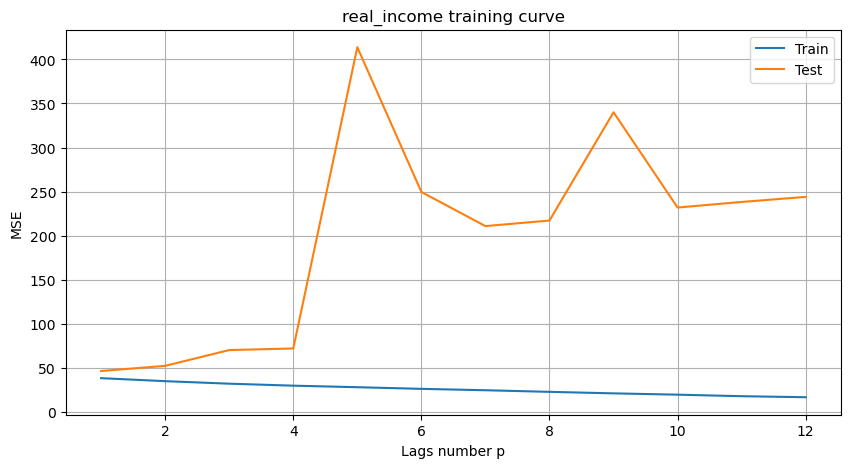

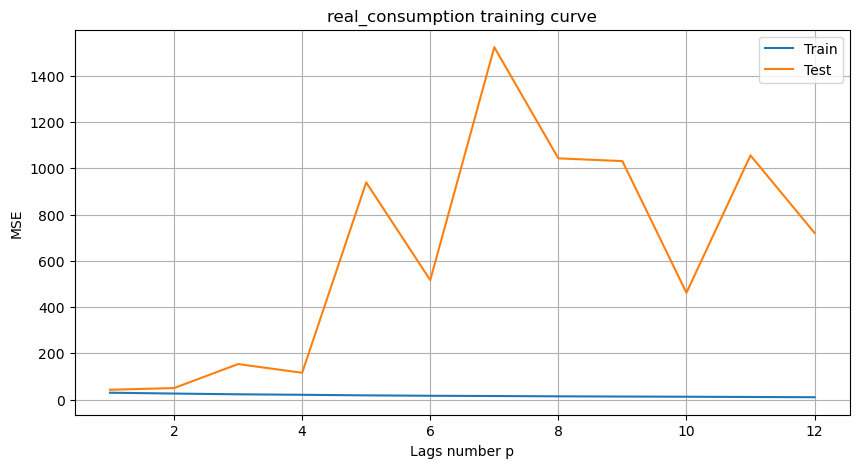

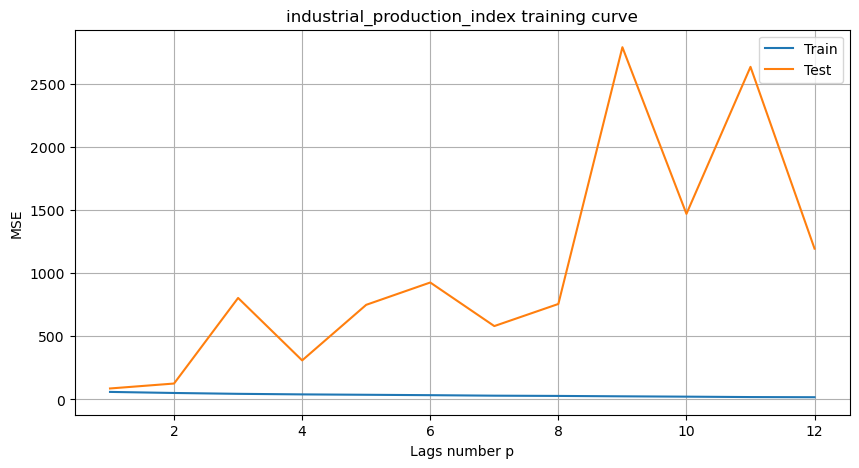

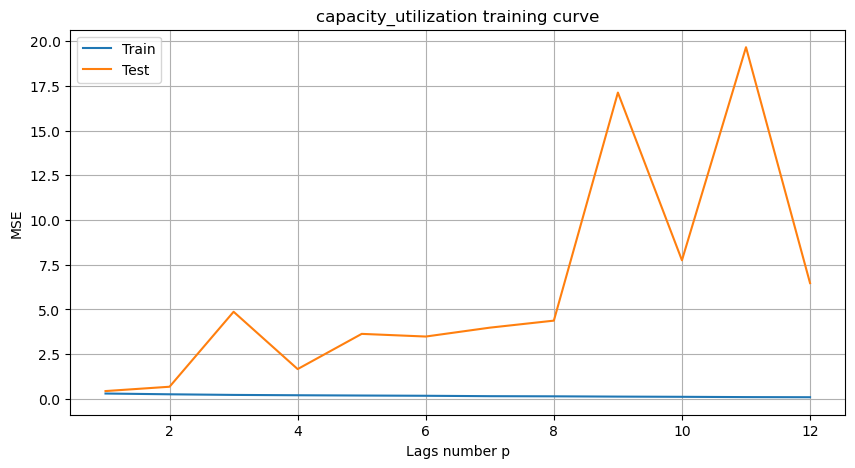

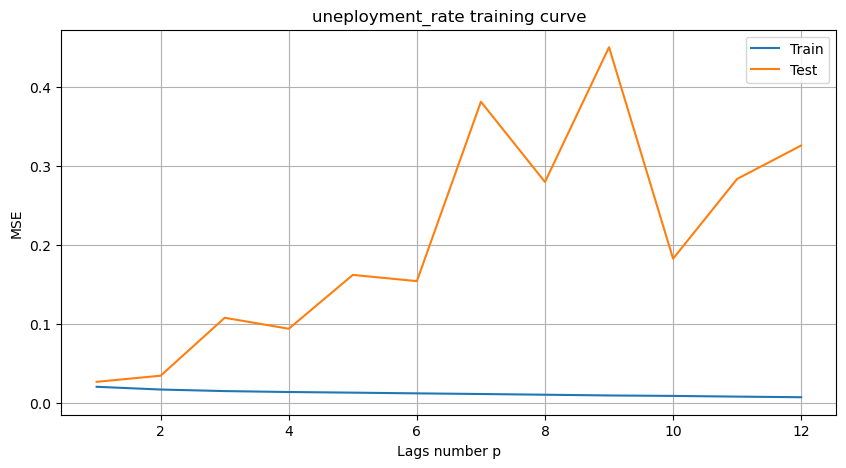

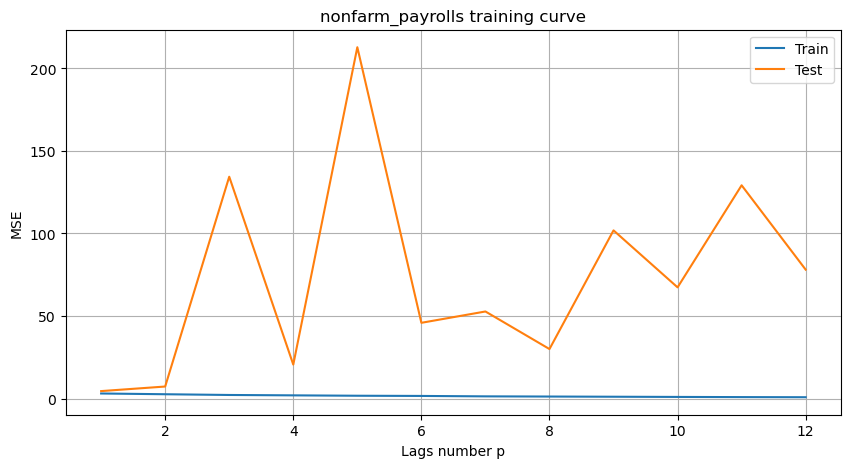

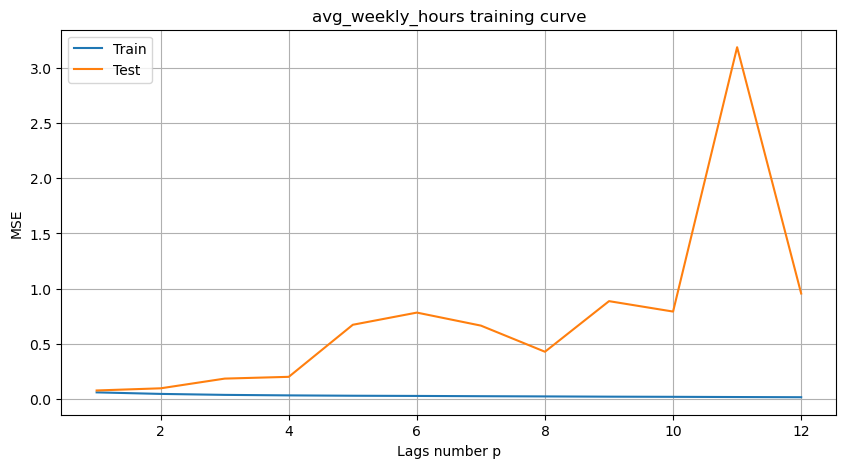

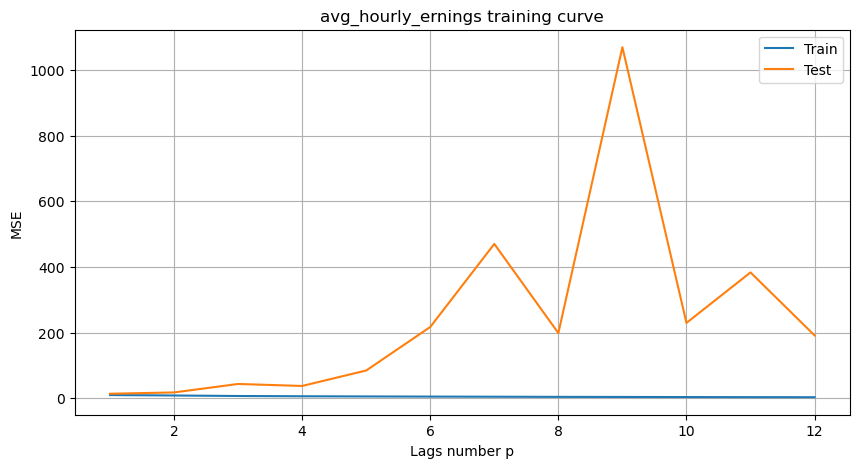

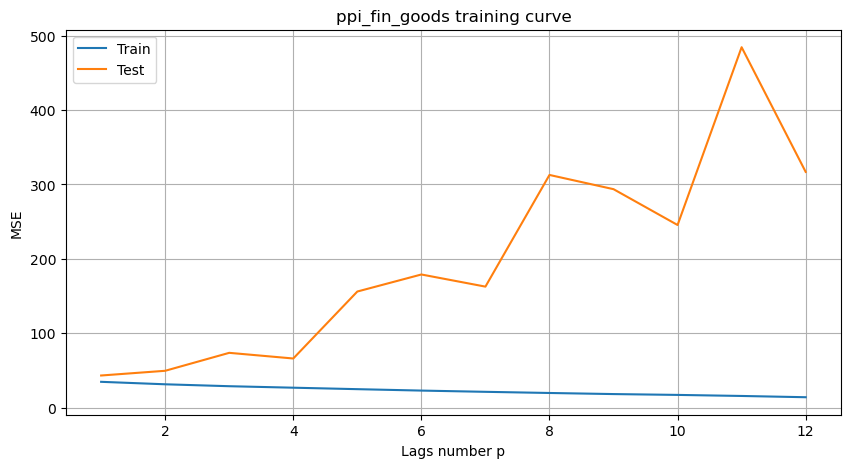

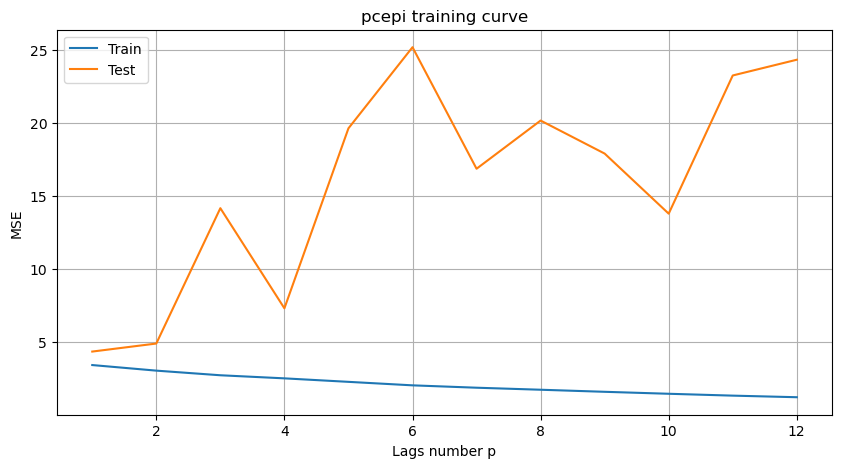

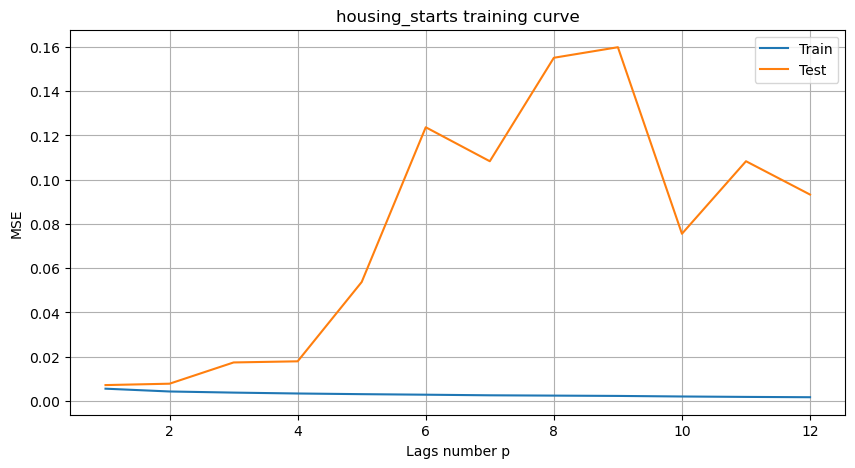

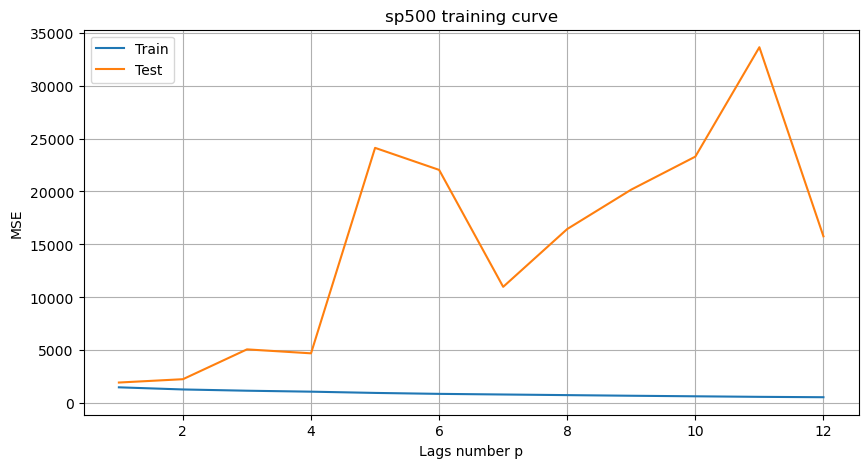

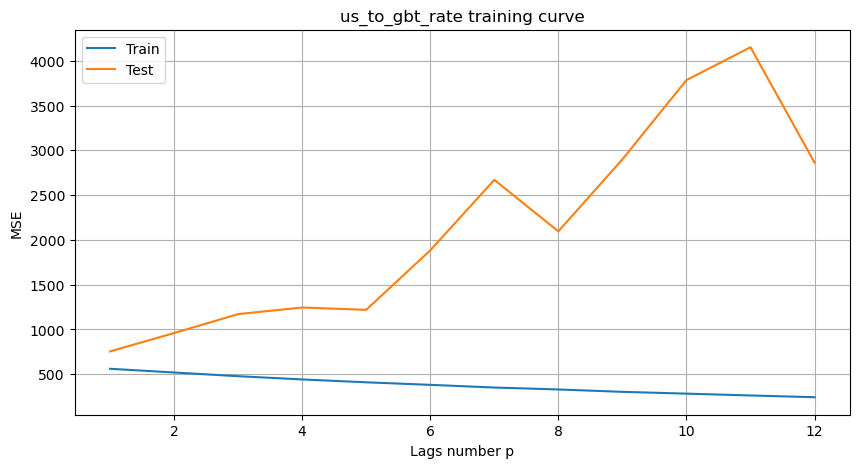

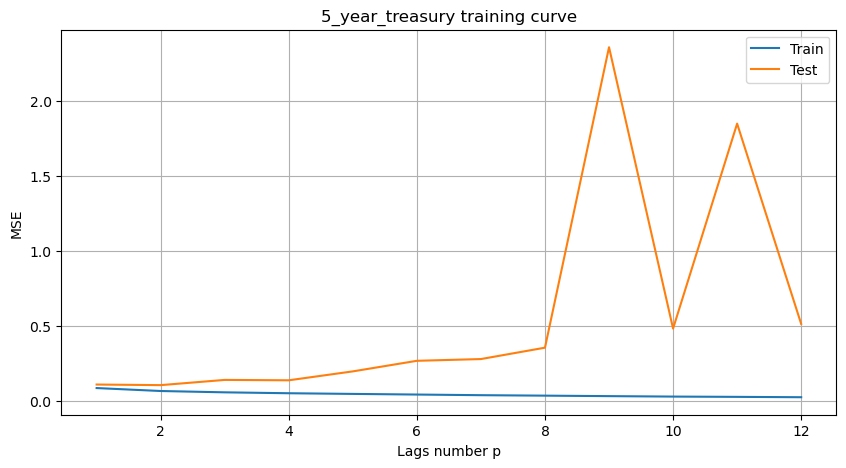

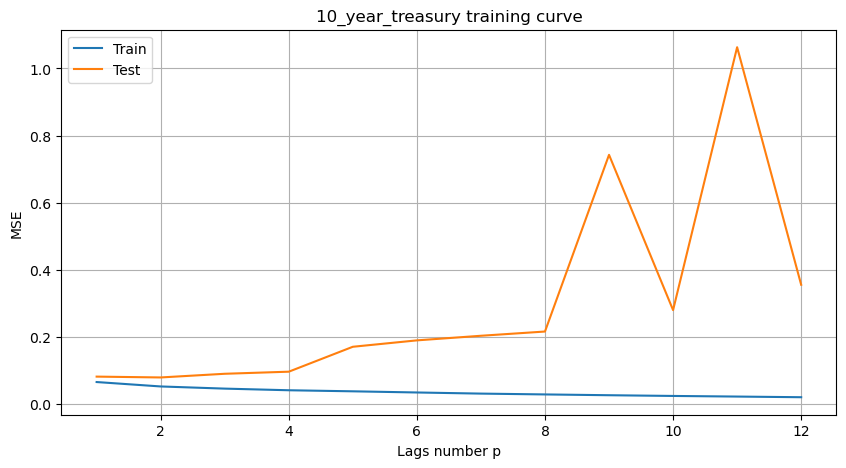

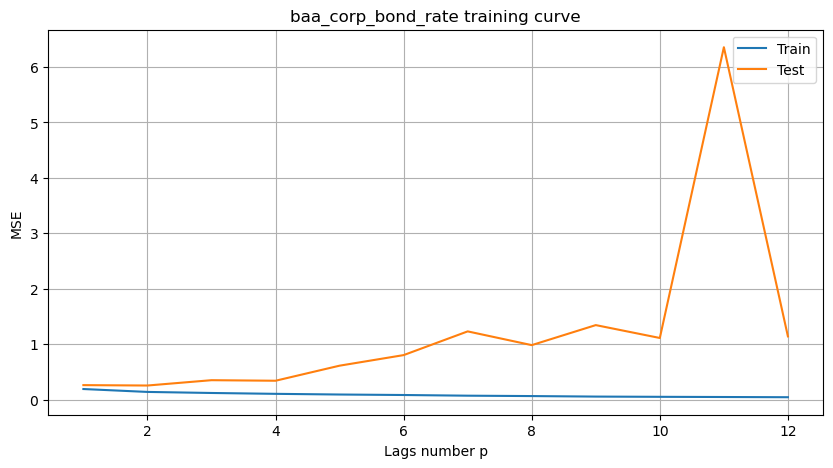

In [14]:
for f in sample.columns:
    res = p_results[p_results["feature"] == f].sort_values("p")
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.grid()
    sns.lineplot(x=ps, y=res["var_train_result"], label="Train")
    sns.lineplot(x=ps, y=res["var_test_result"], label="Test")
    plt.xlabel("Lags number p")
    plt.ylabel("MSE")
    plt.title(f"{f} training curve")

### Analyzing the best results

In [15]:
best_p = 1
results = run_var_cv(sample, init_rows_train, best_p)

  0%|          | 0/671 [00:00<?, ?it/s]

In [16]:
metrics = {
    "mse": mean_squared_error,
    "mae": mean_absolute_error,
    "mape": mean_absolute_percentage_error
}

metric_df = []
for f in features:
    for m in metrics:
        metric_df.append({"feature": f, 
                          "metric": m,
                          "var_train_result": metrics[m](results[f]["last_train"], results[f]["train_pred"]),
                          "var_test_result": metrics[m](results[f]["test"], results[f]["test_pred"]), 
                          "const_test_result": metrics[m](results[f]["test"], results[f]["last_train"])})
metric_df = pd.DataFrame(metric_df)

In [17]:
metric_df[metric_df["metric"] == "mse"]

,feature,metric,var_train_result,var_test_result,const_test_result
0,real_income,mse,37.972,46.085,100.513
3,real_consumption,mse,29.700,42.547,89.085
6,industrial_production_index,mse,60.086,87.314,103.319
9,capacity_utilization,mse,0.294,0.432,0.386
12,uneployment_rate,mse,0.020,0.026,0.030
15,nonfarm_payrolls,mse,3.037,4.486,5.188
18,avg_weekly_hours,mse,0.061,0.078,0.070
21,avg_hourly_ernings,mse,9.527,13.528,23.020
24,ppi_fin_goods,mse,34.583,43.082,64.997
27,pcepi,mse,3.434,4.358,5.303


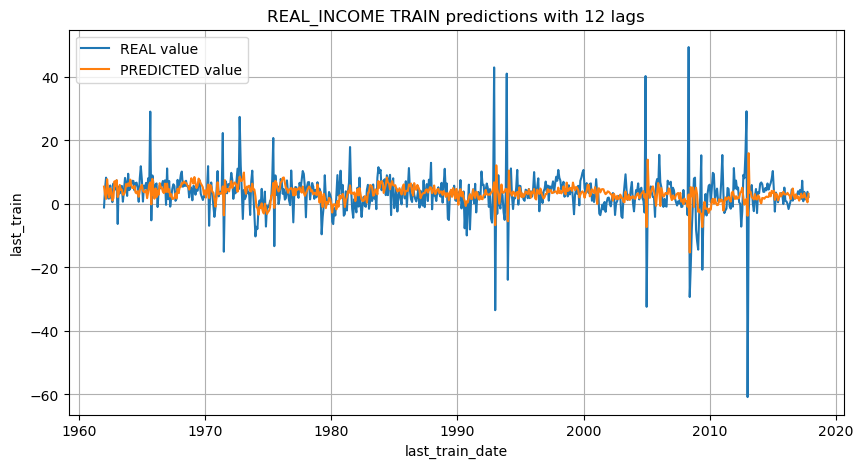

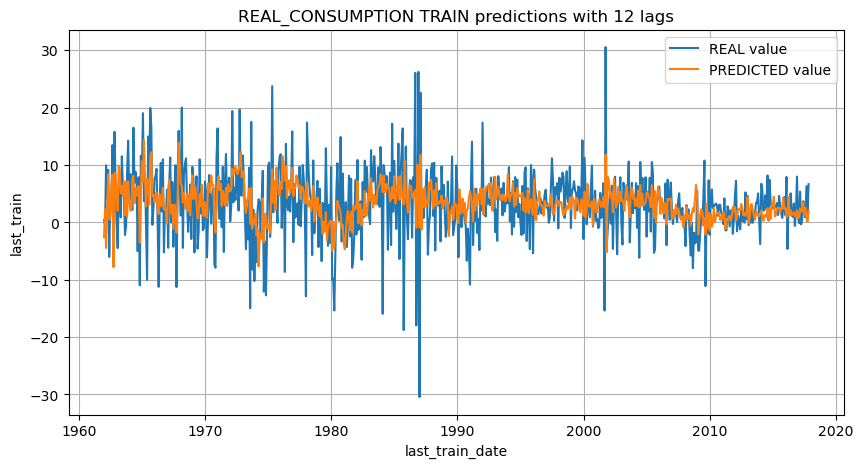

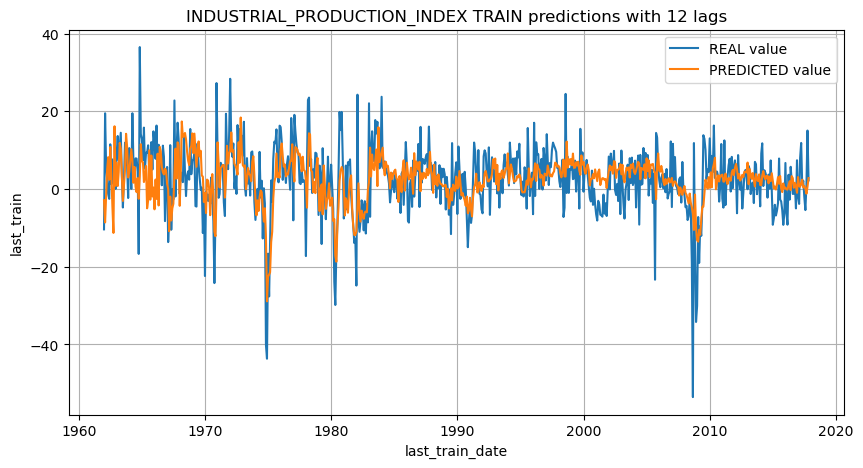

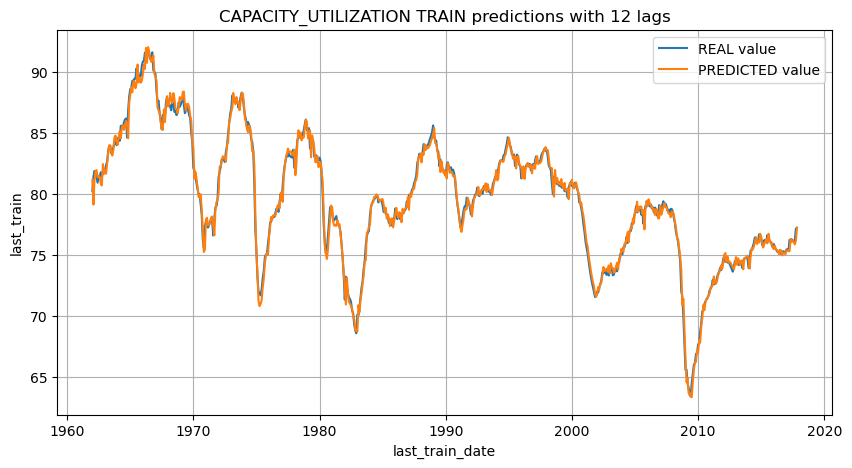

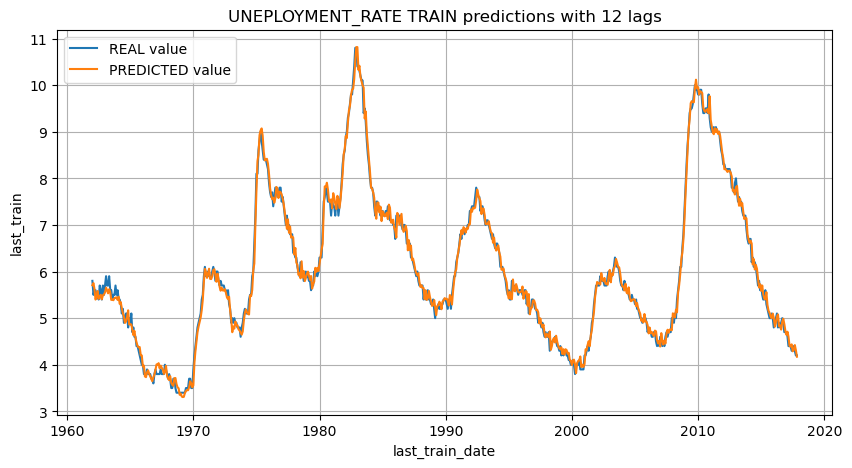

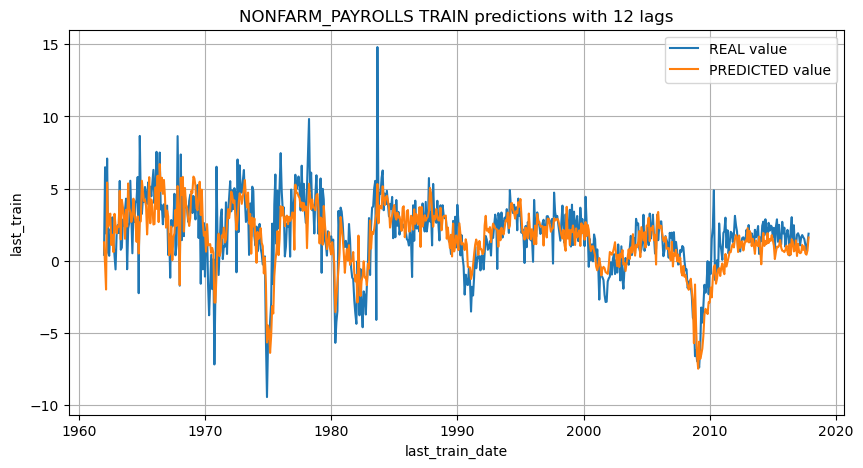

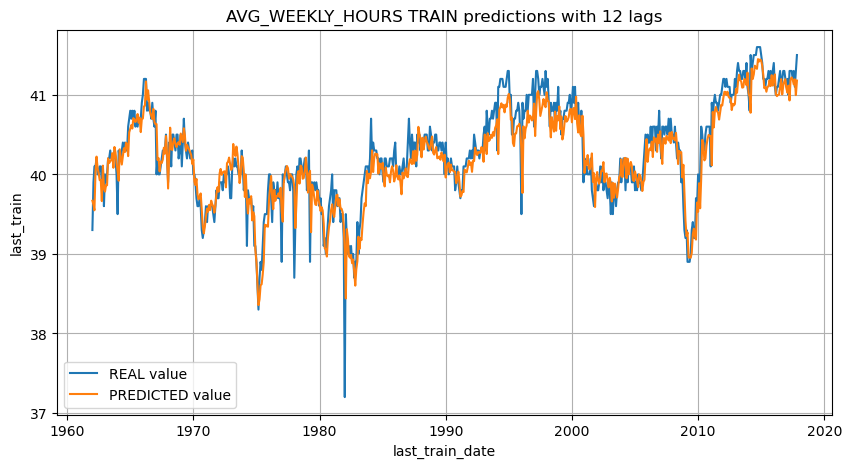

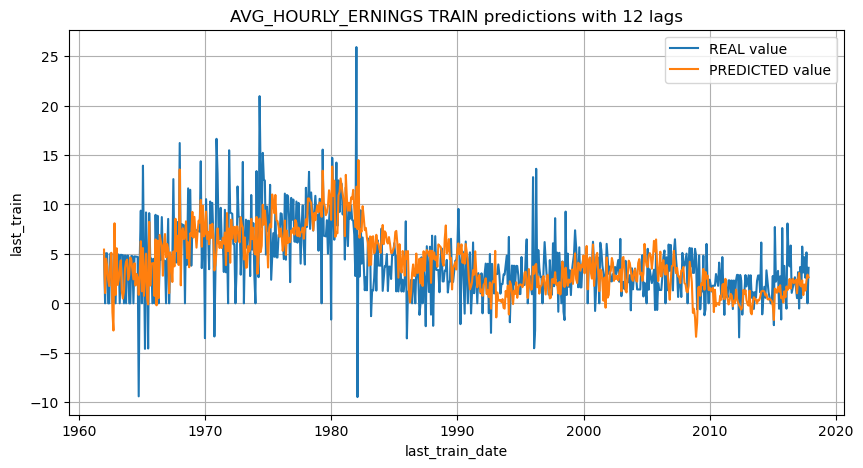

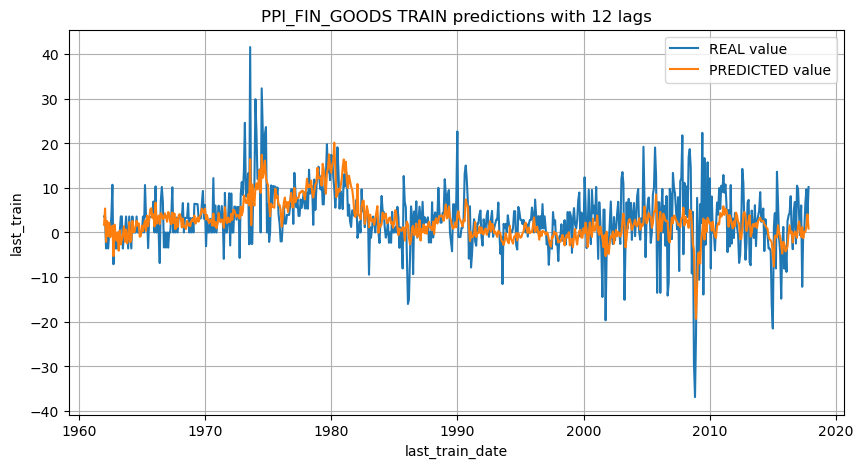

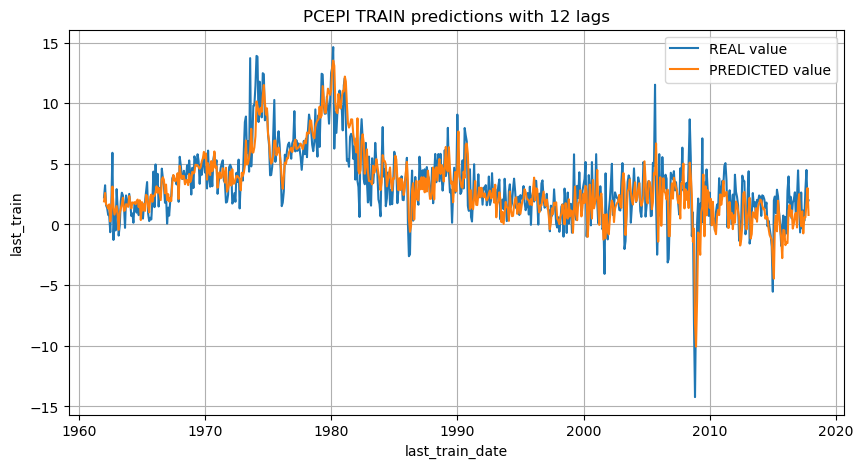

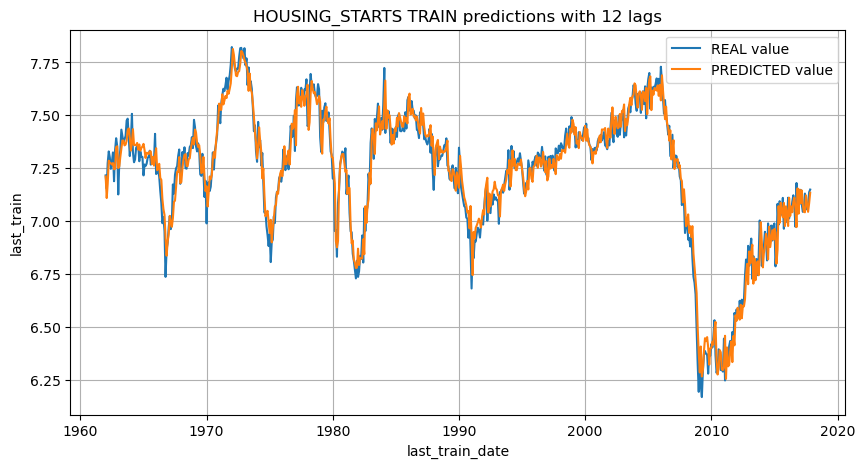

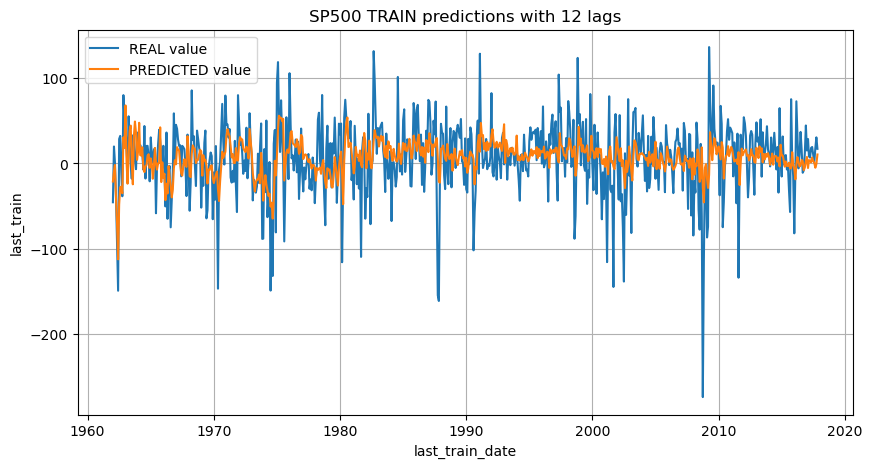

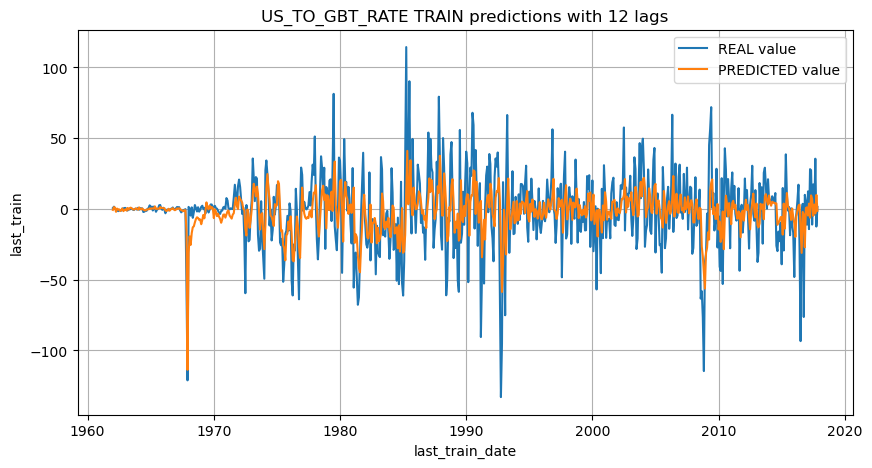

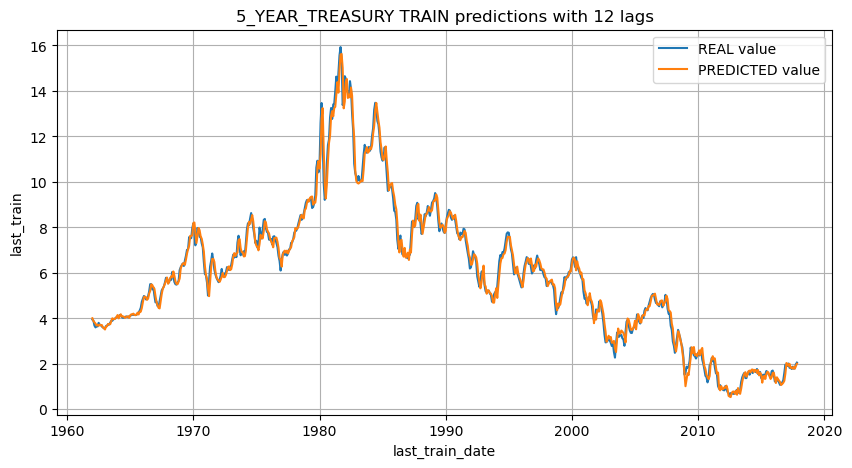

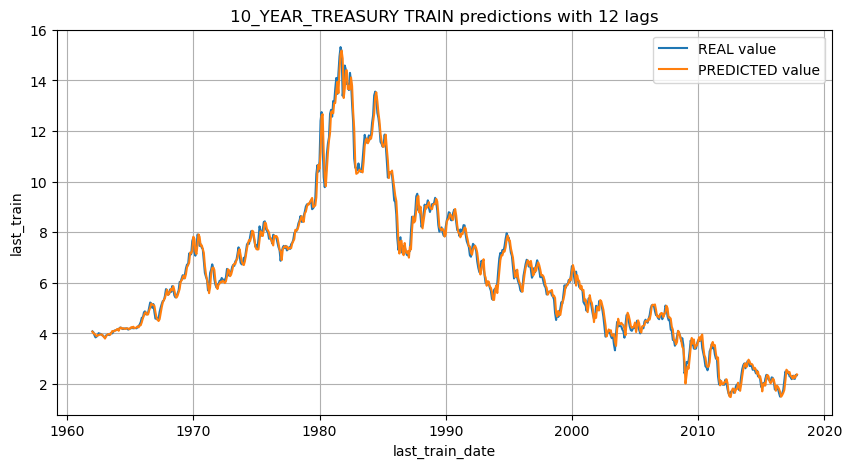

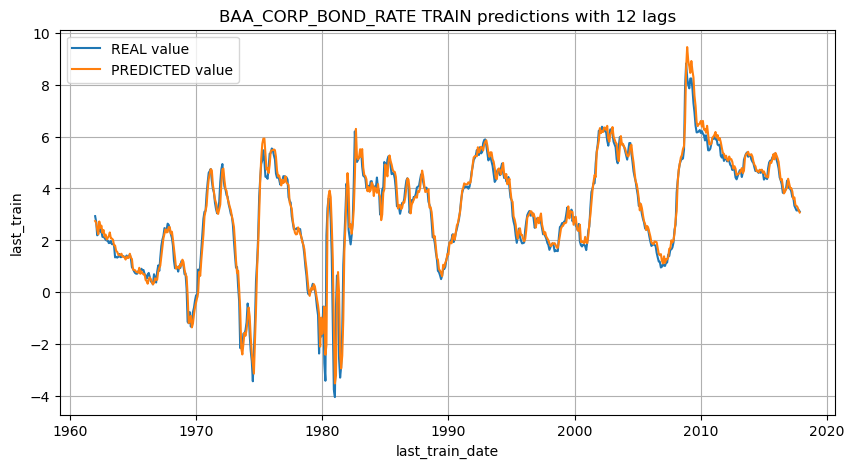

In [18]:
for f in features:
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.grid()
    sns.lineplot(x=results[f]["last_train_date"], y=results[f]["last_train"], label="REAL value");
    sns.lineplot(x=results[f]["last_train_date"], y=results[f]["train_pred"], label="PREDICTED value");
    plt.title(f"{f.upper()} TRAIN predictions with {p} lags");

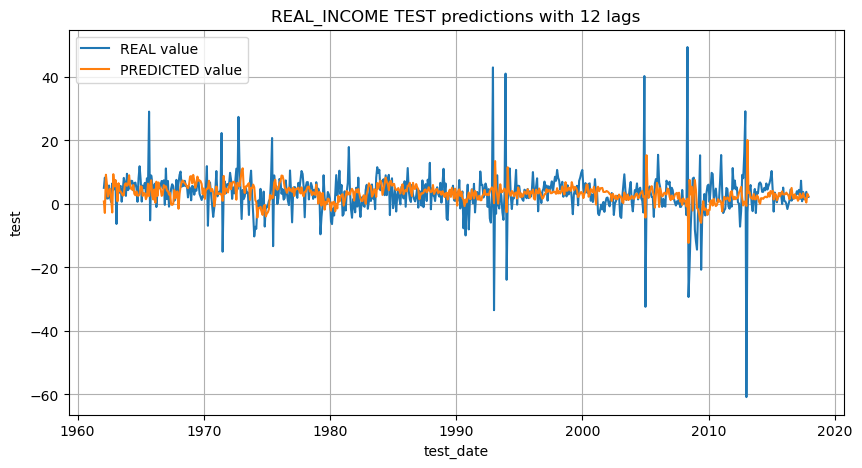

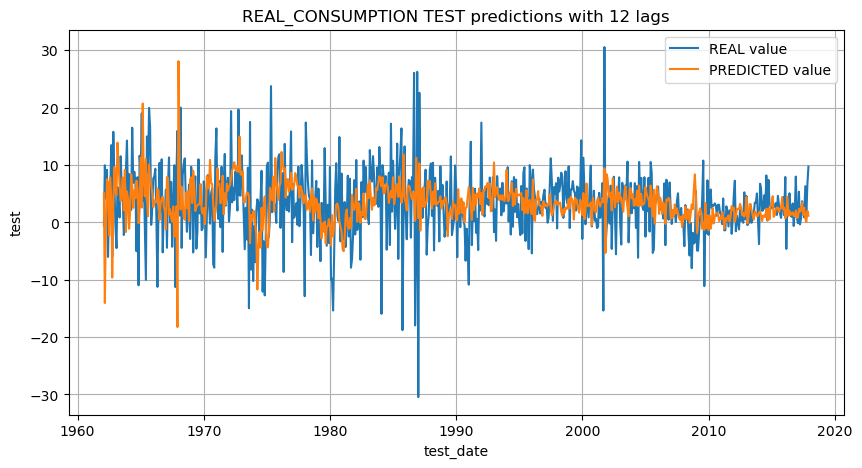

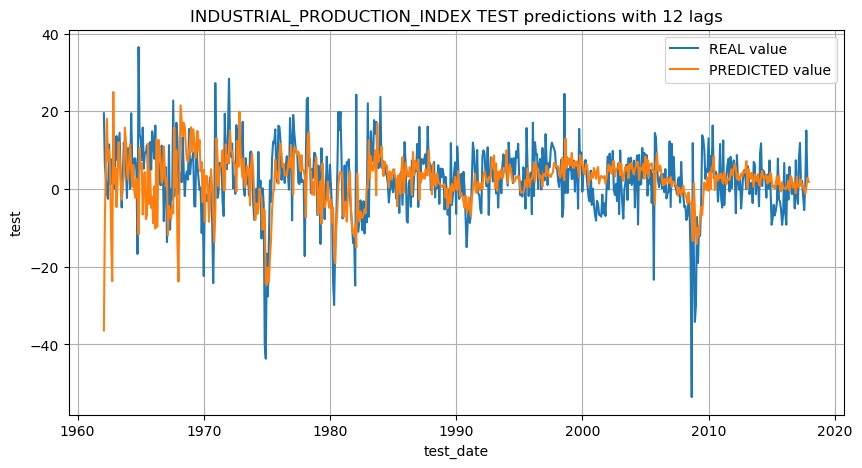

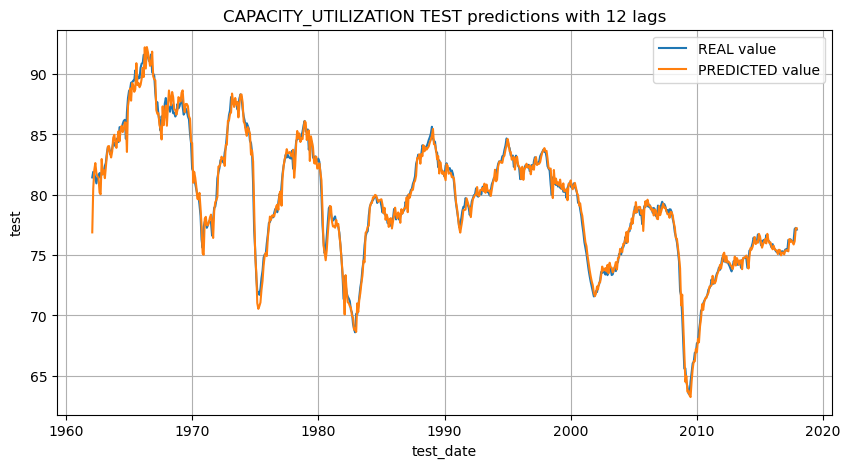

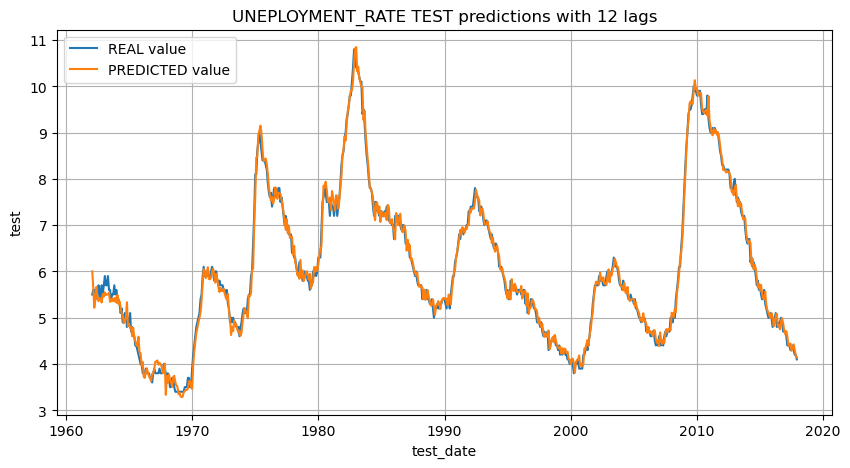

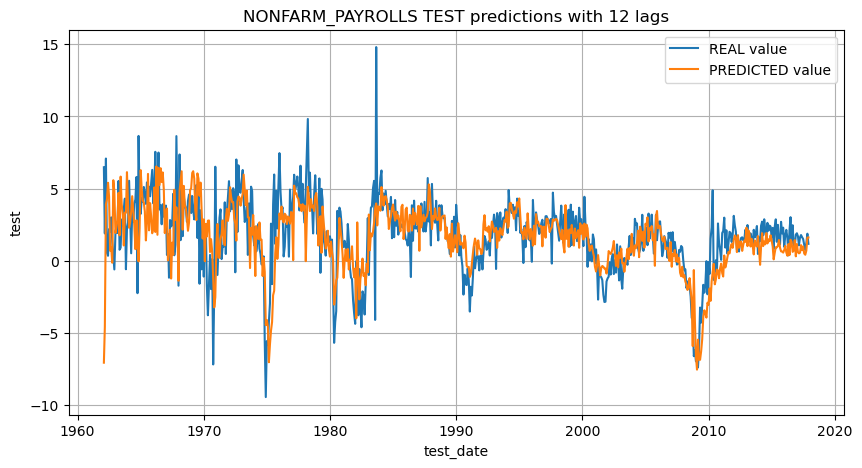

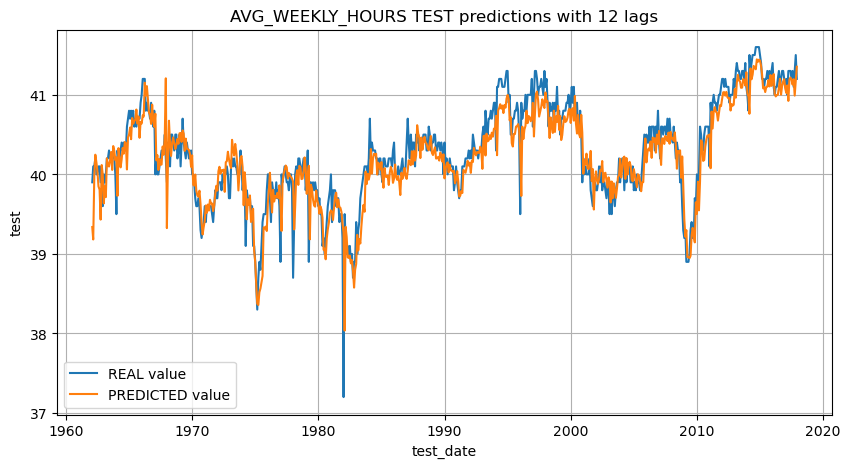

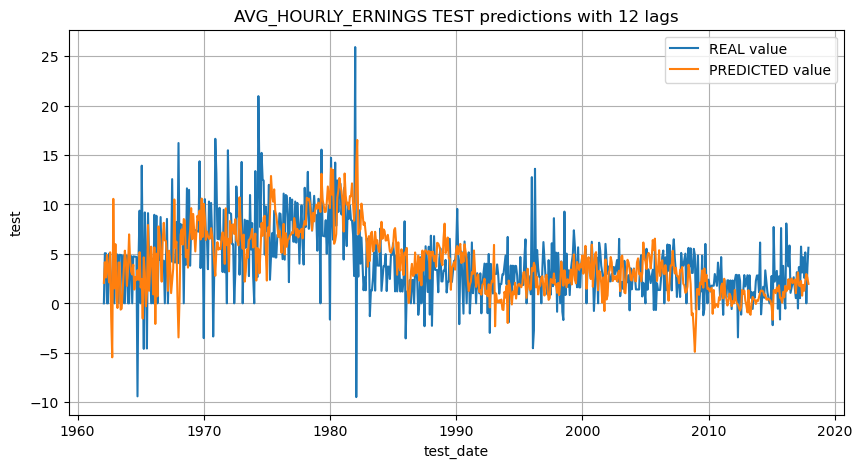

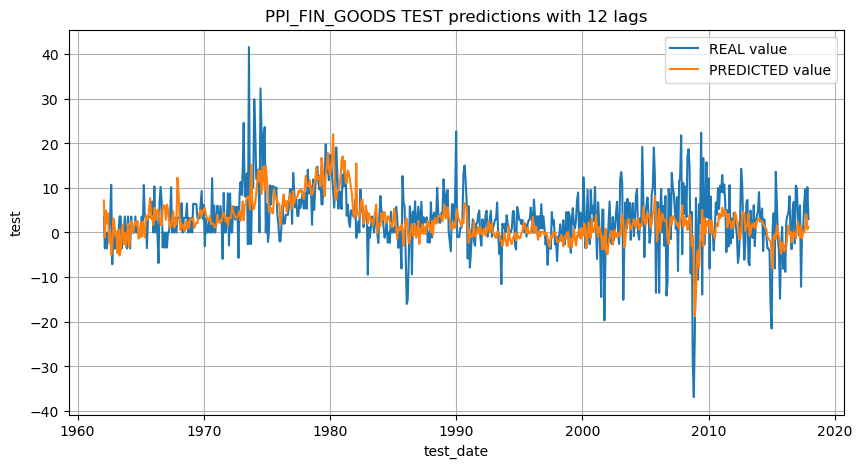

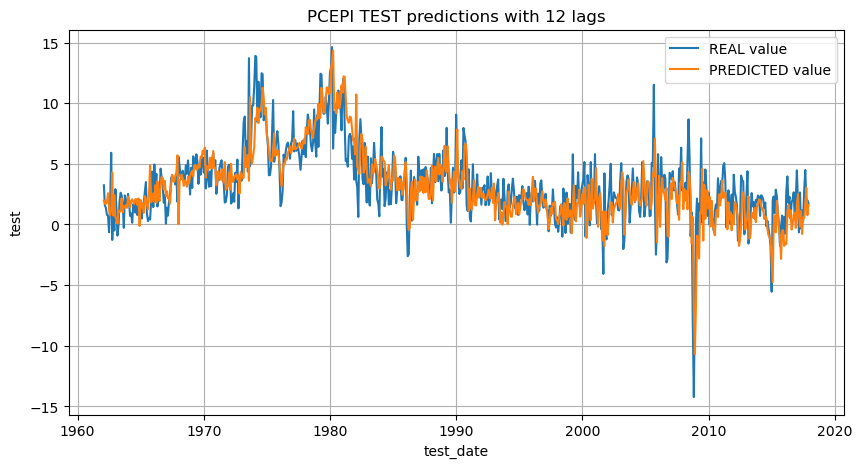

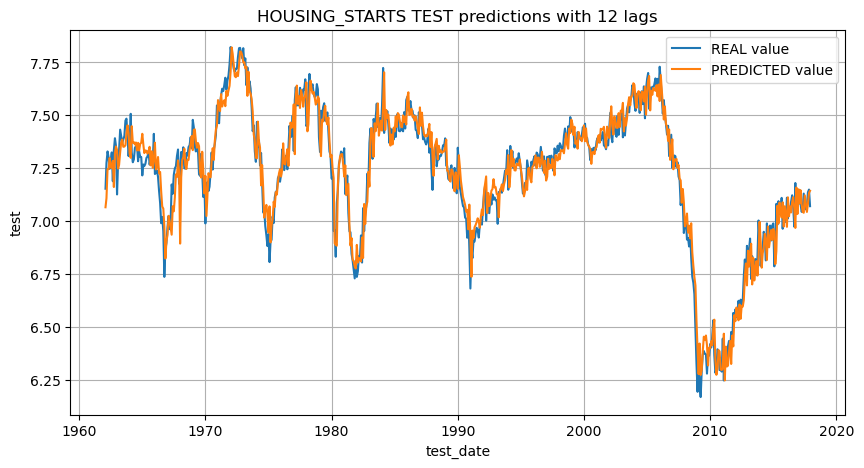

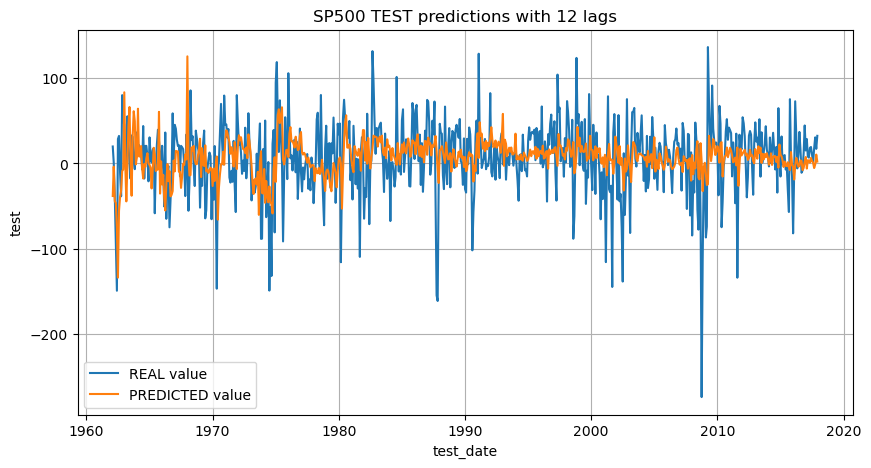

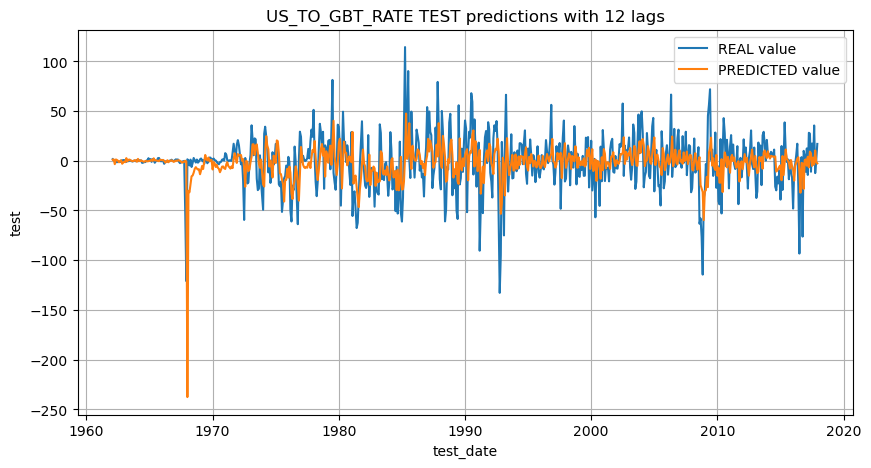

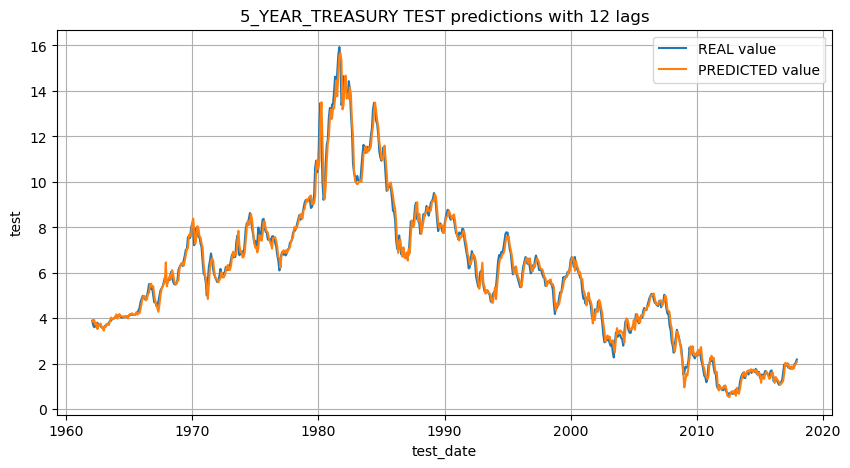

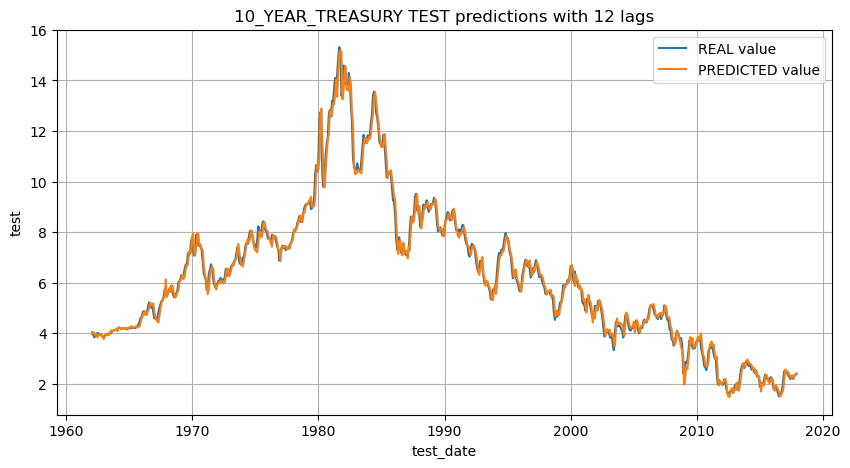

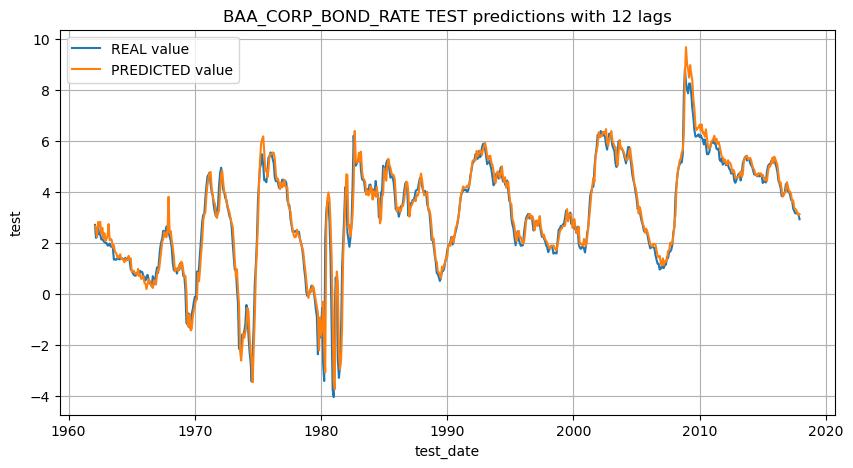

In [19]:
for f in features:
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.grid()
    sns.lineplot(x=results[f]["test_date"], y=results[f]["test"], label="REAL value");
    sns.lineplot(x=results[f]["test_date"], y=results[f]["test_pred"], label="PREDICTED value");
    plt.title(f"{f.upper()} TEST predictions with {p} lags");

It seems like that thing is not about overfitting. We need to think more about the reasons of poor VAR performance

**Interesting observations**
- The higher is amount of lags the better is train error and the worse is the test one
- The proposition above is true starting from number of lags = 1
- There are some *easy-to-predict* variables for which the VAR model predictions are close to constant lag-1 ones. These are *capacity utilization, uneployment rate, average weekly hours, housing starts, 5 year treasury, 10 year treasury.* Their removal from the model does not change the picture drastically, just improves results for individual positions.